# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

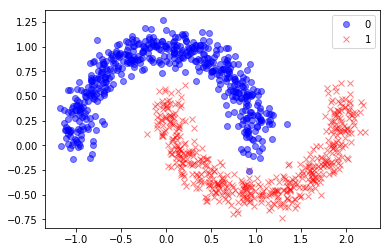

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [7]:
X.shape

(1000, 2)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow Model

In [11]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [13]:
results = model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

In [14]:
results

[0.31840477605660755, 0.84666666746139529]

In [15]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


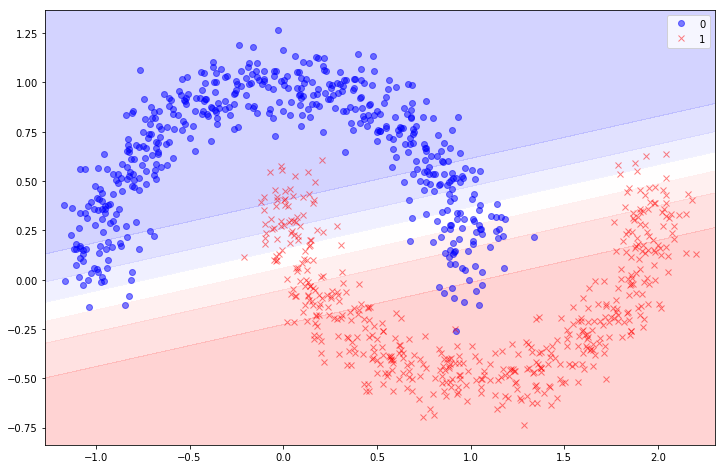

In [16]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [23]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [25]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.0025179352968310318, 1.0]

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	1.000


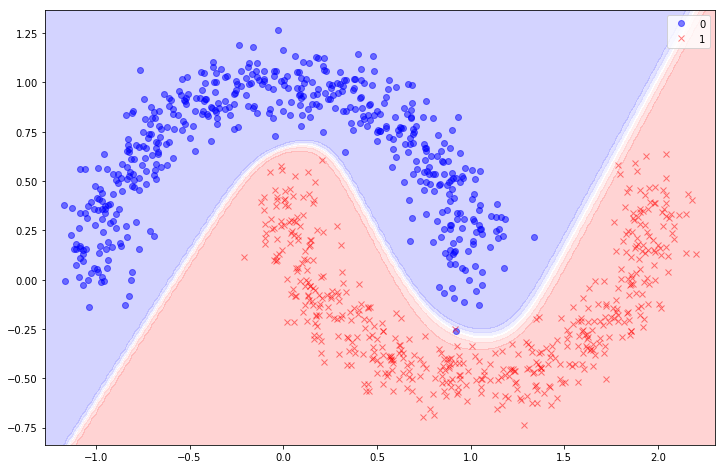

In [28]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [29]:
df = pd.read_csv('../data/iris.csv')

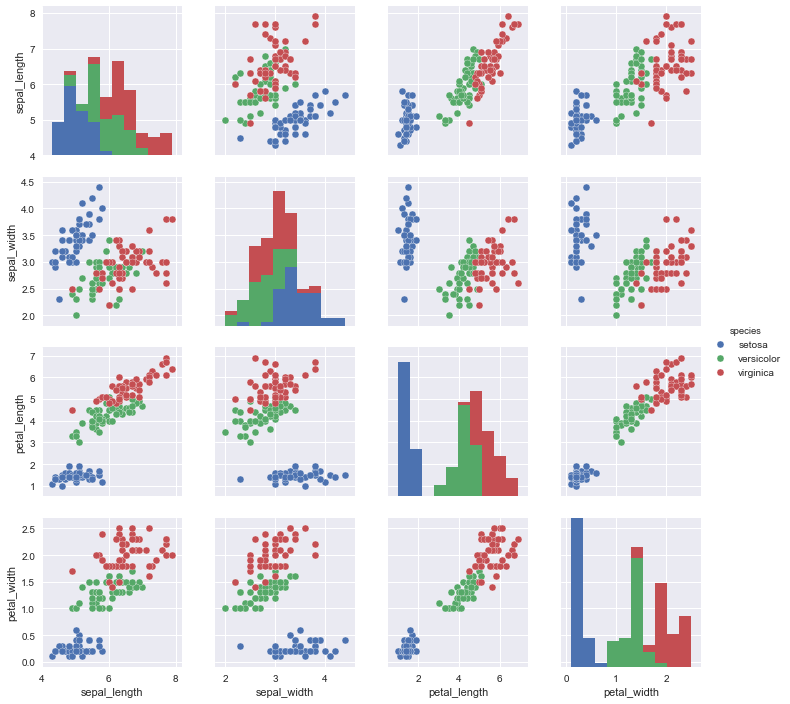

In [30]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [35]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [36]:
from keras.utils.np_utils import to_categorical

In [37]:
y_cat = to_categorical(y)

In [38]:
y_cat[:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [40]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s - loss: 5.7667 - acc: 0.3056 - val_loss: 1.0702 - val_acc: 0.5000
Epoch 2/20
108/108 [==============================] - 0s - loss: 1.4340 - acc: 0.4722 - val_loss: 3.7567 - val_acc: 0.5000
Epoch 3/20
108/108 [==============================] - 0s - loss: 2.4478 - acc: 0.6944 - val_loss: 3.0700 - val_acc: 0.5000
Epoch 4/20
108/108 [==============================] - 0s - loss: 1.4346 - acc: 0.6944 - val_loss: 0.6579 - val_acc: 0.7500
Epoch 5/20
108/108 [==============================] - 0s - loss: 1.0990 - acc: 0.6296 - val_loss: 0.8690 - val_acc: 0.7500
Epoch 6/20
108/108 [==============================] - 0s - loss: 1.1439 - acc: 0.6296 - val_loss: 0.5282 - val_acc: 0.7500
Epoch 7/20
108/108 [==============================] - 0s - loss: 0.7480 - acc: 0.6389 - val_loss: 1.2934 - val_acc: 0.5000
Epoch 8/20
108/108 [==============================] - 0s - loss: 0.7465 - acc: 0.6667 - val_lo

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred[:5]

array([[  1.28645021e-02,   5.33293843e-01,   4.53841627e-01],
       [  1.16028069e-02,   5.27375400e-01,   4.61021841e-01],
       [  9.43445385e-01,   5.49121462e-02,   1.64249504e-03],
       [  4.13958944e-04,   2.35006765e-01,   7.64579237e-01],
       [  3.87410820e-02,   6.38089836e-01,   3.23169082e-01]], dtype=float32)

In [44]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.75      0.86         8
          2       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30



In [47]:
confusion_matrix(y_test_class, y_pred_class)

array([[11,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 11]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [120]:
df = pd.read_csv('../data/diabetes.csv')

In [121]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


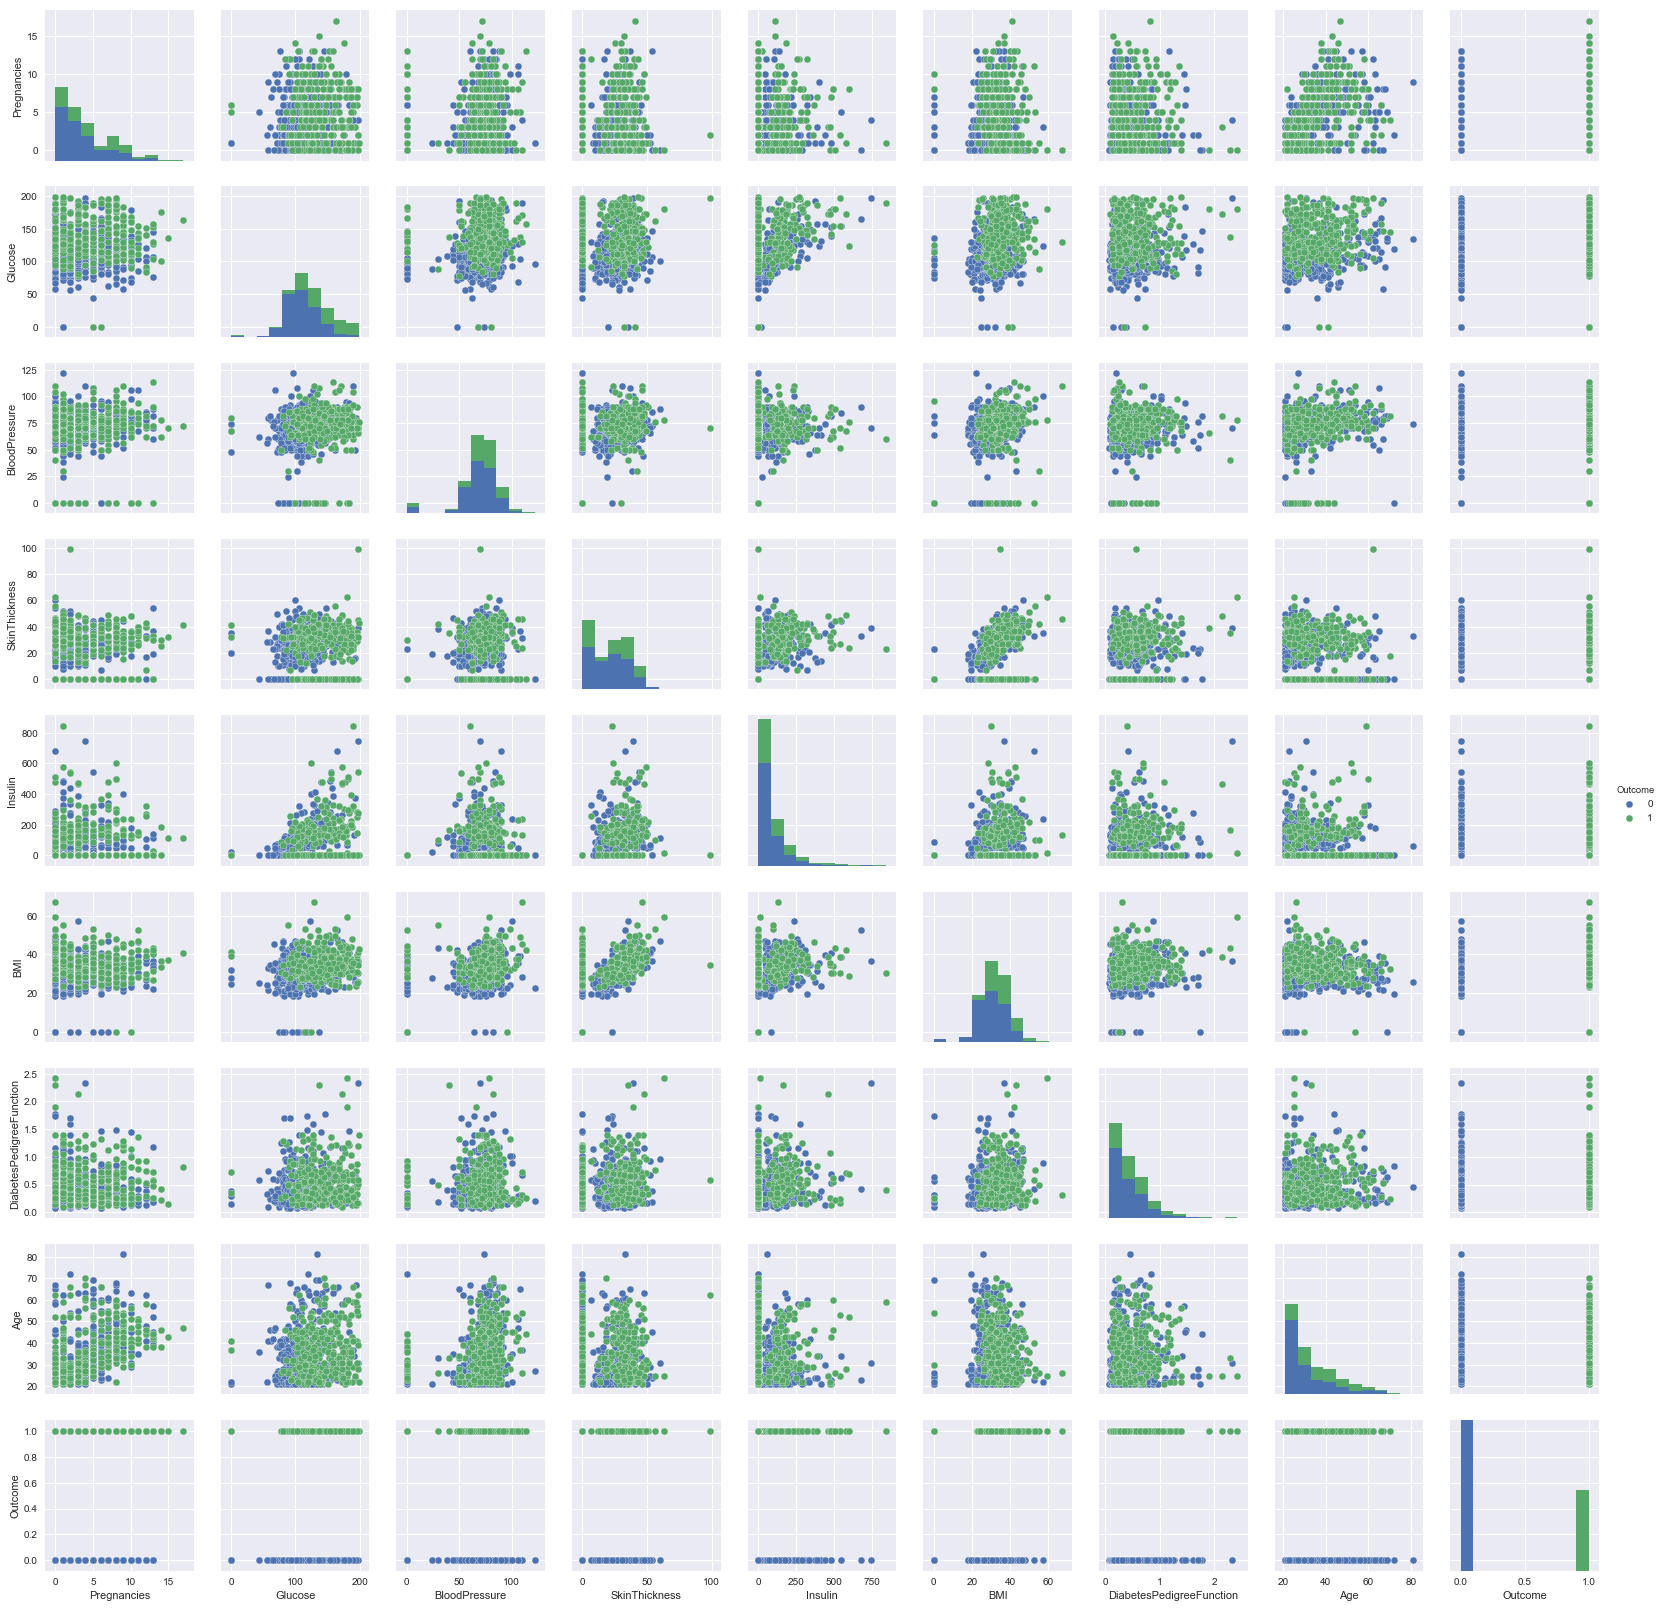

In [124]:
sns.pairplot(data = df, hue = 'Outcome')

In [125]:
X = df.drop('Outcome', axis=1)
y = df['Outcome'].values

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [128]:
X_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

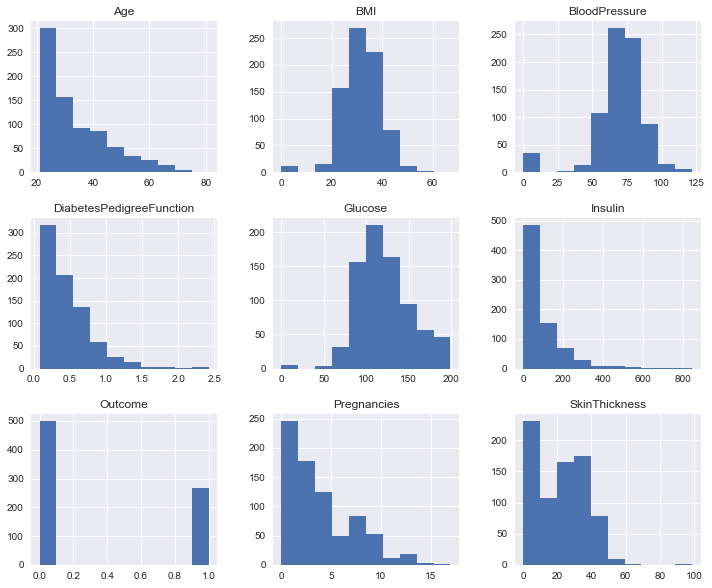

In [129]:
df.hist(figsize = (12,10))
plt.show()

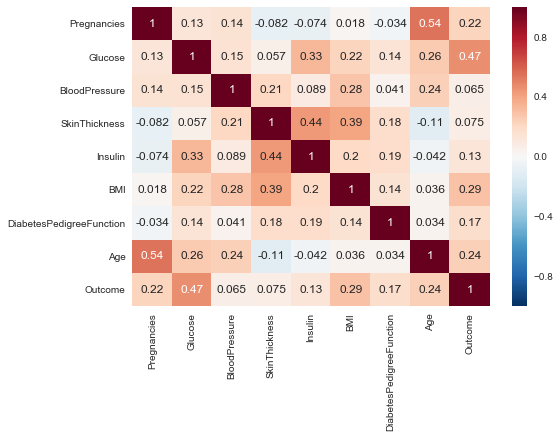

In [130]:
sns.heatmap(df.corr(), annot = True)

In [131]:
from keras.utils import to_categorical

In [132]:
y = to_categorical(y)

In [133]:
X.shape

(768, 8)

In [134]:
y.shape

(768, 2)

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 22)

In [136]:
from keras.optimizers import Adam

In [141]:
model = Sequential()
model.add(Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = Adam(lr=0.05), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [142]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.fit(X_train, y_train, epochs = 20, verbose = 2, validation_split = 0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/20
0s - loss: 0.5726 - acc: 0.7029 - val_loss: 0.5161 - val_acc: 0.8065
Epoch 2/20
0s - loss: 0.4697 - acc: 0.7935 - val_loss: 0.6305 - val_acc: 0.7903
Epoch 3/20
0s - loss: 0.4863 - acc: 0.7699 - val_loss: 0.5229 - val_acc: 0.7581
Epoch 4/20
0s - loss: 0.4537 - acc: 0.7899 - val_loss: 0.5897 - val_acc: 0.7419
Epoch 5/20
0s - loss: 0.4394 - acc: 0.7844 - val_loss: 0.6393 - val_acc: 0.7903
Epoch 6/20
0s - loss: 0.4463 - acc: 0.7826 - val_loss: 0.5351 - val_acc: 0.7742
Epoch 7/20
0s - loss: 0.4310 - acc: 0.8152 - val_loss: 0.6121 - val_acc: 0.7581
Epoch 8/20
0s - loss: 0.4359 - acc: 0.8043 - val_loss: 0.5427 - val_acc: 0.7419
Epoch 9/20
0s - loss: 0.4190 - acc: 0.7935 - val_loss: 0.6547 - val_acc: 0.7903
Epoch 10/20
0s - loss: 0.4198 - acc: 0.7935 - val_loss: 0.6747 - val_acc: 0.7581
Epoch 11/20
0s - loss: 0.4176 - acc: 0.8116 - val_loss: 0.5800 - val_acc: 0.7581
Epoch 12/20
0s - loss: 0.4496 - acc: 0.8043 - val_loss: 0.5535 - val_acc:

In [144]:
predictions = model.predict(X_test)

In [147]:
y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(predictions, axis = 1)

In [152]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.72      0.91      0.81       100
          1       0.68      0.35      0.46        54

avg / total       0.71      0.71      0.69       154



In [150]:
accuracy_score(y_test_class, y_pred_class)

0.7142857142857143

In [153]:
confusion_matrix(y_test_class, y_pred_class)

array([[91,  9],
       [35, 19]])

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
